In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
data = requests.get(url).text

In [3]:
soup = BeautifulSoup(data,'html5lib')

In [4]:
tables = soup.find_all('table')
len(tables)

71

In [5]:
for index,table in enumerate(tables):
    if ("2021 (second-half) monthly cumulative COVID-19 deaths" in str(table)):
        table_index = index
print(table_index)

14


In [6]:
print(tables[table_index].prettify())

<table class="wikitable sortable tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
 <caption>
  2021 (second-half) monthly cumulative COVID-19 deaths
  <sup class="reference" id="cite_ref-WHO-csv_30-1">
   <a href="#cite_note-WHO-csv-30">
    [22]
   </a>
  </sup>
  <sup class="reference" id="cite_ref-WHO-dashboard_31-1">
   <a href="#cite_note-WHO-dashboard-31">
    [23]
   </a>
  </sup>
  <sup class="reference" id="cite_ref-WHO-reports_32-1">
   <a href="#cite_note-WHO-reports-32">
    [24]
   </a>
  </sup>
 </caption>
 <tbody>
  <tr class="sticky-row">
   <th class="unsortable">
   </th>
   <th scope="col">
    Location
   </th>
   <th scope="col">
    <abbr title="July">
     Jul
    </abbr>
    1
   </th>
   <th scope="col">
    <abbr title="August">
     Aug
    </abbr>
    1
   </th>
   <th scope="col">
    <abbr title="September">
     Sep
    </abbr>
    1
   </th>
   <th scope="col">
    <abbr title="October">
     Oct
  

In [7]:
tables[table_index].tbody.find_all('tr')[1]

<tr class="sorttop">
<td style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/>
</td>
<th scope="row"><b>World</b>
</th>
<td>3,954,147</td>
<td>4,229,169</td>
<td>4,536,307</td>
<td>4,794,137</td>
<td>5,005,025</td>
<td>5,215,745
</td></tr>

In [8]:
Corona_df = pd.DataFrame(columns=['Location','Jul','Aug','Sep','Oct','Nov','Dec'])

for row in tables[table_index].tbody.find_all('tr'):
    col_td = row.find_all('td')
    col_th = row.find_all('th')
    if (col_td !=[] and col_th !=[]):
        Location = col_th[0].text.strip()
        Jul = col_td[1].text.strip()
        Aug = col_td[2].text.strip()
        Sep = col_td[3].text.strip()
        Oct = col_td[4].text.strip()
        Nov = col_td[5].text.strip()
        Dec = col_td[6].text.strip()
        Corona_df = Corona_df.append({'Location':Location,'Jul':Jul,'Aug':Aug,\
                                      'Sep':Sep,'Oct':Oct,'Nov':Nov,'Dec':Dec}\
                                      ,ignore_index=True)
Corona_df.head()

,Location,Jul,Aug,Sep,Oct,Nov,Dec
0,World,"3,954,147","4,229,169","4,536,307","4,794,137","5,005,025","5,215,745"
1,United States,"600,853","610,606","642,770","697,430","743,217","774,868"
2,Brazil,"515,985","555,460","579,574","596,122","607,694","614,376"
3,India,"399,459","424,351","439,020","448,339","458,437","469,247"
4,Mexico,"238,055","245,959","267,253","283,091","290,717","293,950"


In [9]:
import re
p = re.compile(r'[^\w\s]+')
for col in Corona_df.columns:
    if col !='Location':
        Corona_df[col] = [p.sub('', x) for x in Corona_df[col].tolist()]

In [10]:
Corona_df.head()

,Location,Jul,Aug,Sep,Oct,Nov,Dec
0,World,3954147,4229169,4536307,4794137,5005025,5215745
1,United States,600853,610606,642770,697430,743217,774868
2,Brazil,515985,555460,579574,596122,607694,614376
3,India,399459,424351,439020,448339,458437,469247
4,Mexico,238055,245959,267253,283091,290717,293950


In [11]:
for colmn in Corona_df.columns:
    if colmn!="Location":
        Corona_df[colmn] = Corona_df[colmn].astype(int)

In [12]:
Corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  238 non-null    object
 1   Jul       238 non-null    int32 
 2   Aug       238 non-null    int32 
 3   Sep       238 non-null    int32 
 4   Oct       238 non-null    int32 
 5   Nov       238 non-null    int32 
 6   Dec       238 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 7.6+ KB


In [13]:
Corona_df["Sum"] = Corona_df.sum(axis=1,numeric_only=True)

In [14]:
Corona_df.head()

,Location,Jul,Aug,Sep,Oct,Nov,Dec,Sum
0,World,3954147,4229169,4536307,4794137,5005025,5215745,27734530
1,United States,600853,610606,642770,697430,743217,774868,4069744
2,Brazil,515985,555460,579574,596122,607694,614376,3469211
3,India,399459,424351,439020,448339,458437,469247,2638853
4,Mexico,238055,245959,267253,283091,290717,293950,1619025


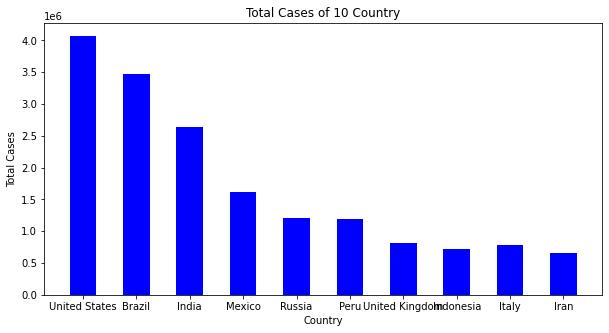

In [16]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Corona_df["Location"][1:11],Corona_df["Sum"][1:11],width=.5,color="blue")
plt.xlabel('Country')
plt.ylabel("Total Cases")
plt.title('Total Cases of 10 Country')
plt.show()


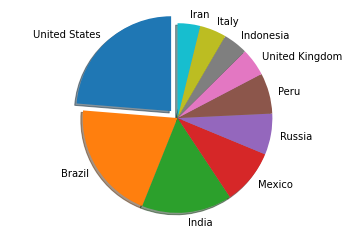

In [124]:
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(x=Corona_df["Sum"][1:11],labels=Corona_df["Location"][1:11],shadow=True,\
        startangle=90,explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()